In [1]:
from typing import List, Tuple, Dict, Set
import numpy as np
import heapq
from math import sqrt
def create_node(position: Tuple[int, int], g: float = float('inf'), 
                h: float = 0.0, parent: Dict = None) -> Dict:
    """
    Create a node for the A* algorithm.
    
    Args:
        position: (x, y) coordinates of the node
        g: Cost from start to this node (default: infinity)
        h: Estimated cost from this node to goal (default: 0)
        parent: Parent node (default: None)
    
    Returns:
        Dictionary containing node information
    """
    return {
        'position': position,
        'g': g,
        'h': h,
        'f': g + h,
        'parent': parent
    }

In [2]:
def calculate_heuristic(pos1: Tuple[int, int], pos2: Tuple[int, int]) -> float:
    """
    Calculate the estimated distance between two points using Euclidean distance.
    """
    x1, y1 = pos1
    x2, y2 = pos2
    return sqrt((x2 - x1)**2 + (y2 - y1)**2)
def get_valid_neighbors(grid: np.ndarray, position: Tuple[int, int]) -> List[Tuple[int, int]]:
    """
    Get all valid neighboring positions in the grid.
    
    Args:
        grid: 2D numpy array where 0 represents walkable cells and 1 represents obstacles
        position: Current position (x, y)
    
    Returns:
        List of valid neighboring positions
    """
    x, y = position
    rows, cols = grid.shape
    
    # All possible moves (including diagonals)
    possible_moves = [
        (x+1, y), (x-1, y),    # Right, Left
        (x, y+1), (x, y-1),    # Up, Down
        (x+1, y+1), (x-1, y-1),  # Diagonal moves
        (x+1, y-1), (x-1, y+1)
    ]
    
    return [
        (nx, ny) for nx, ny in possible_moves
        if 0 <= nx < rows and 0 <= ny < cols  # Within grid bounds
        and grid[nx, ny] == 0                # Not an obstacle
    ]
def reconstruct_path(goal_node: Dict) -> List[Tuple[int, int]]:
    """
    Reconstruct the path from goal to start by following parent pointers.
    """
    path = []
    current = goal_node
    
    while current is not None:
        path.append(current['position'])
        current = current['parent']
        
    return path[::-1]  # Reverse to get path from start to goal

In [3]:
def find_path(grid: np.ndarray, start: Tuple[int, int], 
              goal: Tuple[int, int]) -> List[Tuple[int, int]]:
    """
    Find the optimal path using A* algorithm.
    
    Args:
        grid: 2D numpy array (0 = free space, 1 = obstacle)
        start: Starting position (x, y)
        goal: Goal position (x, y)
    
    Returns:
        List of positions representing the optimal path
    """
    # Initialize start node
    start_node = create_node(
        position=start,
        g=0,
        h=calculate_heuristic(start, goal)
    )
    
    # Initialize open and closed sets
    open_list = [(start_node['f'], start)]  # Priority queue
    open_dict = {start: start_node}         # For quick node lookup
    closed_set = set()                      # Explored nodes
    
    while open_list:
        # Get node with lowest f value
        _, current_pos = heapq.heappop(open_list)
        current_node = open_dict[current_pos]
        
        # Check if we've reached the goal
        if current_pos == goal:
            return reconstruct_path(current_node)
            
        closed_set.add(current_pos)
        
        # Explore neighbors
        for neighbor_pos in get_valid_neighbors(grid, current_pos):
            # Skip if already explored
            if neighbor_pos in closed_set:
                continue
                
            # Calculate new path cost
            tentative_g = current_node['g'] + calculate_heuristic(current_pos, neighbor_pos)
            
            # Create or update neighbor
            if neighbor_pos not in open_dict:
                neighbor = create_node(
                    position=neighbor_pos,
                    g=tentative_g,
                    h=calculate_heuristic(neighbor_pos, goal),
                    parent=current_node
                )
                heapq.heappush(open_list, (neighbor['f'], neighbor_pos))
                open_dict[neighbor_pos] = neighbor
            elif tentative_g < open_dict[neighbor_pos]['g']:
                # Found a better path to the neighbor
                neighbor = open_dict[neighbor_pos]
                neighbor['g'] = tentative_g
                neighbor['f'] = tentative_g + neighbor['h']
                neighbor['parent'] = current_node
    
    return []  # No path found

In [4]:
import matplotlib.pyplot as plt
def visualize_path(grid: np.ndarray, path: List[Tuple[int, int]]):
    """
    Visualize the grid and found path.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='binary')
    
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'b-', linewidth=3, label='Path')
        plt.plot(path[0, 1], path[0, 0], 'go', markersize=15, label='Start')
        plt.plot(path[-1, 1], path[-1, 0], 'ro', markersize=15, label='Goal')
    
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.title("A* Pathfinding Result")
    plt.show()

Path found with 19 steps!


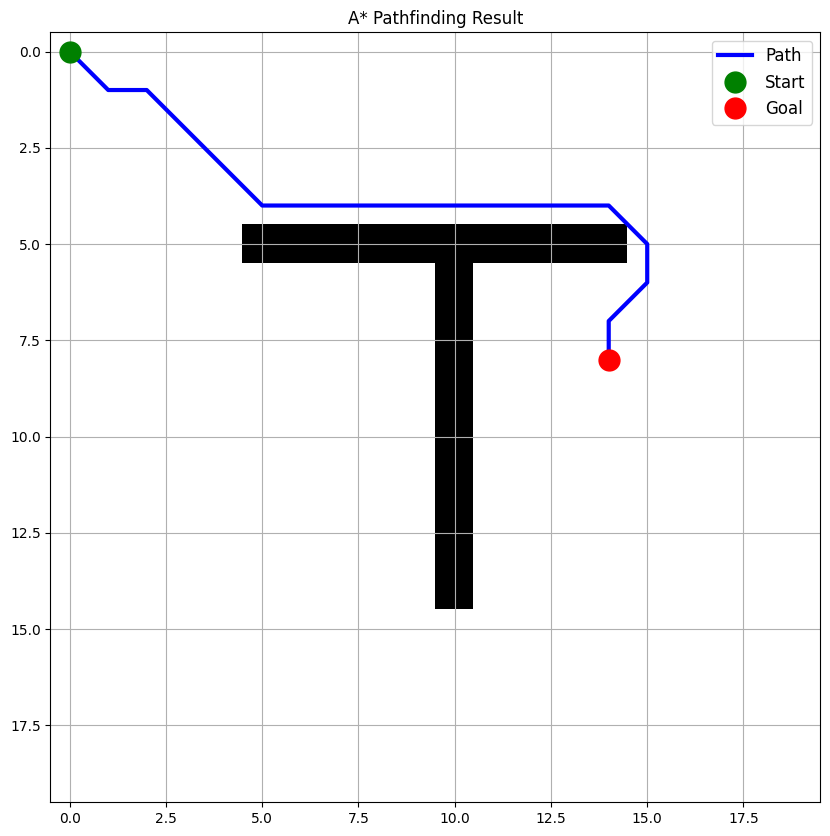

In [6]:
# Create a sample grid
grid = np.zeros((20, 20))  # 20x20 grid, all free space initially
# Add some obstacles
grid[5:15, 10] = 1  # Vertical wall
grid[5, 5:15] = 1   # Horizontal wall
# Define start and goal positions
start_pos = (0, 0)
goal_pos = (8, 14)
# Find the path
path = find_path(grid, start_pos, goal_pos)
if path:
    print(f"Path found with {len(path)} steps!")
    visualize_path(grid, path)
else:
    print("No path found!")